In [1]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import os

# データフレーム読み込み
train_df = pd.read_csv("/kaggle/input/playground-series-s5e8/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s5e8/test.csv")

# データ結合
all_df = pd.concat([train_df,test_df],axis=0,ignore_index=True)
max_row = len(all_df)

In [14]:
print("【訓練データ形状】：",train_df.shape)
print("【評価データ形状】：",test_df.shape)
print("【訓練データ】\n")
print(train_df.info())
print("【評価データ】\n")
print(test_df.info())

【訓練データ形状】： (750000, 18)
【評価データ形状】： (250000, 17)
【訓練データ】

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memo

In [18]:
train_df.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


In [19]:
test_df.describe()

,id,age,balance,day,duration,campaign,pdays,previous
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,874999.500000,40.932332,1197.426352,16.116068,255.342260,2.573548,22.280028,0.303728
std,72168.927986,10.081613,2741.520699,8.258509,271.404326,2.709661,76.915879,1.384574
min,750000.000000,18.000000,-8019.000000,1.000000,3.000000,1.000000,-1.000000,0.000000
25%,812499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000
50%,874999.500000,39.000000,631.000000,17.000000,133.000000,2.000000,-1.000000,0.000000
75%,937499.250000,48.000000,1389.000000,21.000000,353.000000,3.000000,-1.000000,0.000000
max,999999.000000,95.000000,98517.000000,31.000000,4918.000000,58.000000,871.000000,150.000000


In [2]:
# 数値列とカテゴリ列を取得
num_col = []
cat_col = []

train_df2 = train_df.drop(["id","y"],axis=1)

for col in train_df2.columns:
    if train_df[col].dtypes!="object":
        num_col.append(col)
    else:
        cat_col.append(col)

In [119]:
# ターゲット分布
tmp = train_df["y"].value_counts()
print("ターゲット比(1:0)=", round(tmp[1]/len(train_df),2),":",round(tmp[0]/len(train_df),2))

ターゲット比(1:0)= 0.12 : 0.88


In [3]:
# 符号付きLOG
import numpy as np
def signed_log(x, c=None):
    x = np.asarray(x, dtype=float)
    if c is None:
        c = np.subtract(*np.percentile(np.ravel(x), [75, 25]))  # IQR
        if c == 0: c = np.std(x) or 1.0
    return np.sign(x) * np.log1p(np.abs(x) / c), c

In [9]:
signed_log([-2,3],1)[0]

array([-1.09861229,  1.38629436])

In [14]:
t = np.linspace(1, 31, 31)

In [15]:
t

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31.])

/tmp/ipykernel_36/2114304378.py:16: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(freq[mask], np.abs(X[mask]), use_line_collection=True)


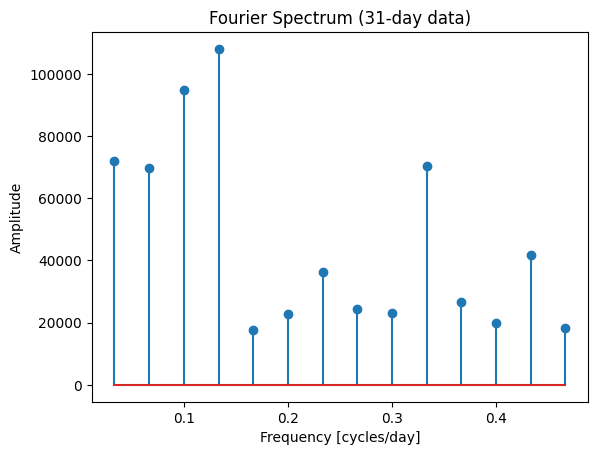

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# サンプル: 31日分の時系列データ
days = np.arange(1, 31)  # 日付 (1〜31)
# 例: 7日周期のサイン波 + ノイズ
# x = np.sin(2*np.pi*days/7) + 0.3*np.random.randn(31)
x = abc

# フーリエ変換
X = np.fft.fft(x)
freq = np.fft.fftfreq(len(x), d=1)  # d=1 はサンプリング間隔=1日

# 片側スペクトルだけ描画
mask = freq > 0
plt.stem(freq[mask], np.abs(X[mask]), use_line_collection=True)
plt.xlabel("Frequency [cycles/day]")
plt.ylabel("Amplitude")
plt.title("Fourier Spectrum (31-day data)")
plt.show()

In [11]:
print("周期 = ",1/freq[0:4])

周期 =  [inf 30. 15. 10.]


/tmp/ipykernel_36/428468374.py:1: RuntimeWarning: divide by zero encountered in divide
  print("周期 = ",1/freq[0:4])


In [3]:
abc = train_df.loc[train_df["y"]==0,"day"].value_counts().sort_index(ascending=True).to_numpy()

In [7]:
abc = abc[:30]

In [8]:
abc.shape

(30,)

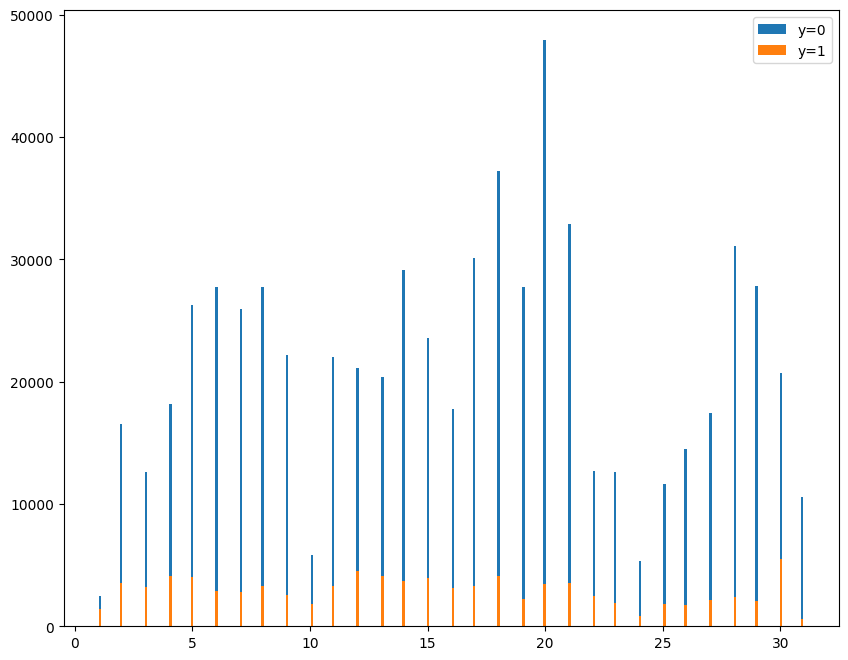

In [4]:
# ターゲットが 0 と 1 の分布を比較する()
import matplotlib.pyplot as plt

# 全体の大きさ
plt.figure(figsize=(10,8))
plt.hist(train_df.loc[train_df["y"]==0,"day"],bins=200,density=False,label="y=0", rwidth=0.7)
plt.hist(train_df.loc[train_df["y"]==1,"day"],bins=200,density=False,label="y=1", rwidth=0.7)
    
# plt.hist(train_df.loc[train_df["y"]==0,"day"],bins=200,density=True,label="y=0", rwidth=0.7)
# plt.hist(train_df.loc[train_df["y"]==1,"day"],bins=200,density=True,label="y=1", rwidth=0.7)
plt.legend()

# 描画する
plt.show()


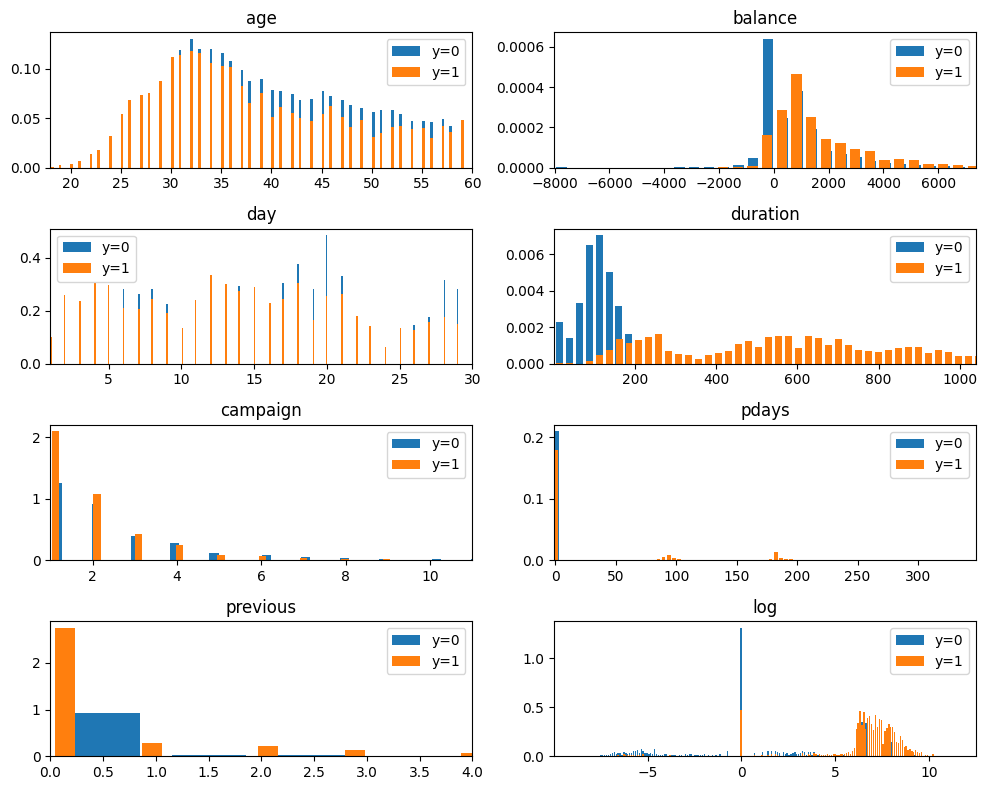

In [13]:
# ターゲットが 0 と 1 の分布を比較する()
import matplotlib.pyplot as plt

# 数値データの差異
def numplot(cols):

    # 全体の大きさ
    plt.figure(figsize=(10,8))
    
    for i, col in enumerate(cols):

        # 上下5%の値を取る
        low,high = train_df[col].quantile([0,0.98])
        
        # レイアウトの順番
        layout = 421 + i
        
        plt.subplot(layout)
        plt.hist(train_df.loc[train_df["y"]==0,col],bins=200,density=True,label="y=0", rwidth=0.7)
        plt.hist(train_df.loc[train_df["y"]==1,col],bins=200,density=True,label="y=1", rwidth=0.7)
        # plt.hist(train_df.loc[train_df["y"]==0,col],bins=200,histtype="barstacked",density=True,label="y=0")
        # plt.hist(train_df.loc[train_df["y"]==1,col],bins=200,histtype="barstacked",density=True,label="y=1")
        plt.xlim(low,high)
        plt.title(col)
        plt.legend()

    # balanceのlogスケールを
    layout = 428
        
    plt.subplot(layout)
    plt.hist(signed_log(train_df.loc[train_df["y"]==0,"balance"],1)[0],bins=200,density=True,label="y=0", rwidth=0.7)
    plt.hist(signed_log(train_df.loc[train_df["y"]==1,"balance"],1)[0],bins=200,density=True,label="y=1", rwidth=0.7)
    # plt.xlim(low,high)
    plt.title("log")
    plt.legend()    

    # 揃える
    plt.tight_layout()

    # 描画する
    plt.show()

numplot(num_col)

### 数値列の分布

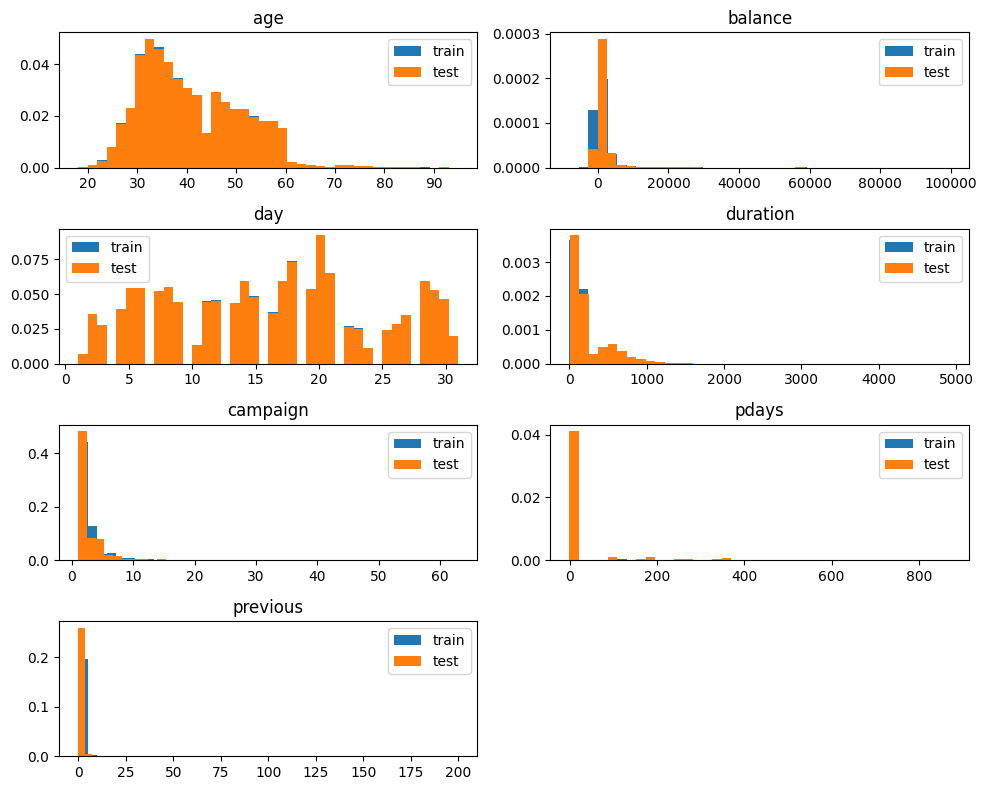

In [130]:
# import matplotlib.pyplot as plt

# # 数値データの差異
# def numplot(cols):

#     # 全体の大きさ
#     plt.figure(figsize=(10,8))
    
#     for i, col in enumerate(cols):
    
#         # レイアウトの順番
#         layout = 421 + i
        
#         plt.subplot(layout)
#         plt.hist(train_df[col],bins=40,density=True,label="train")
#         plt.hist(test_df[col],bins=40,density=True,label="test")
#         plt.title(col)
#         plt.legend()

#     # 揃える
#     plt.tight_layout()

#     # 描画する
#     plt.show()

# numplot(num_col)

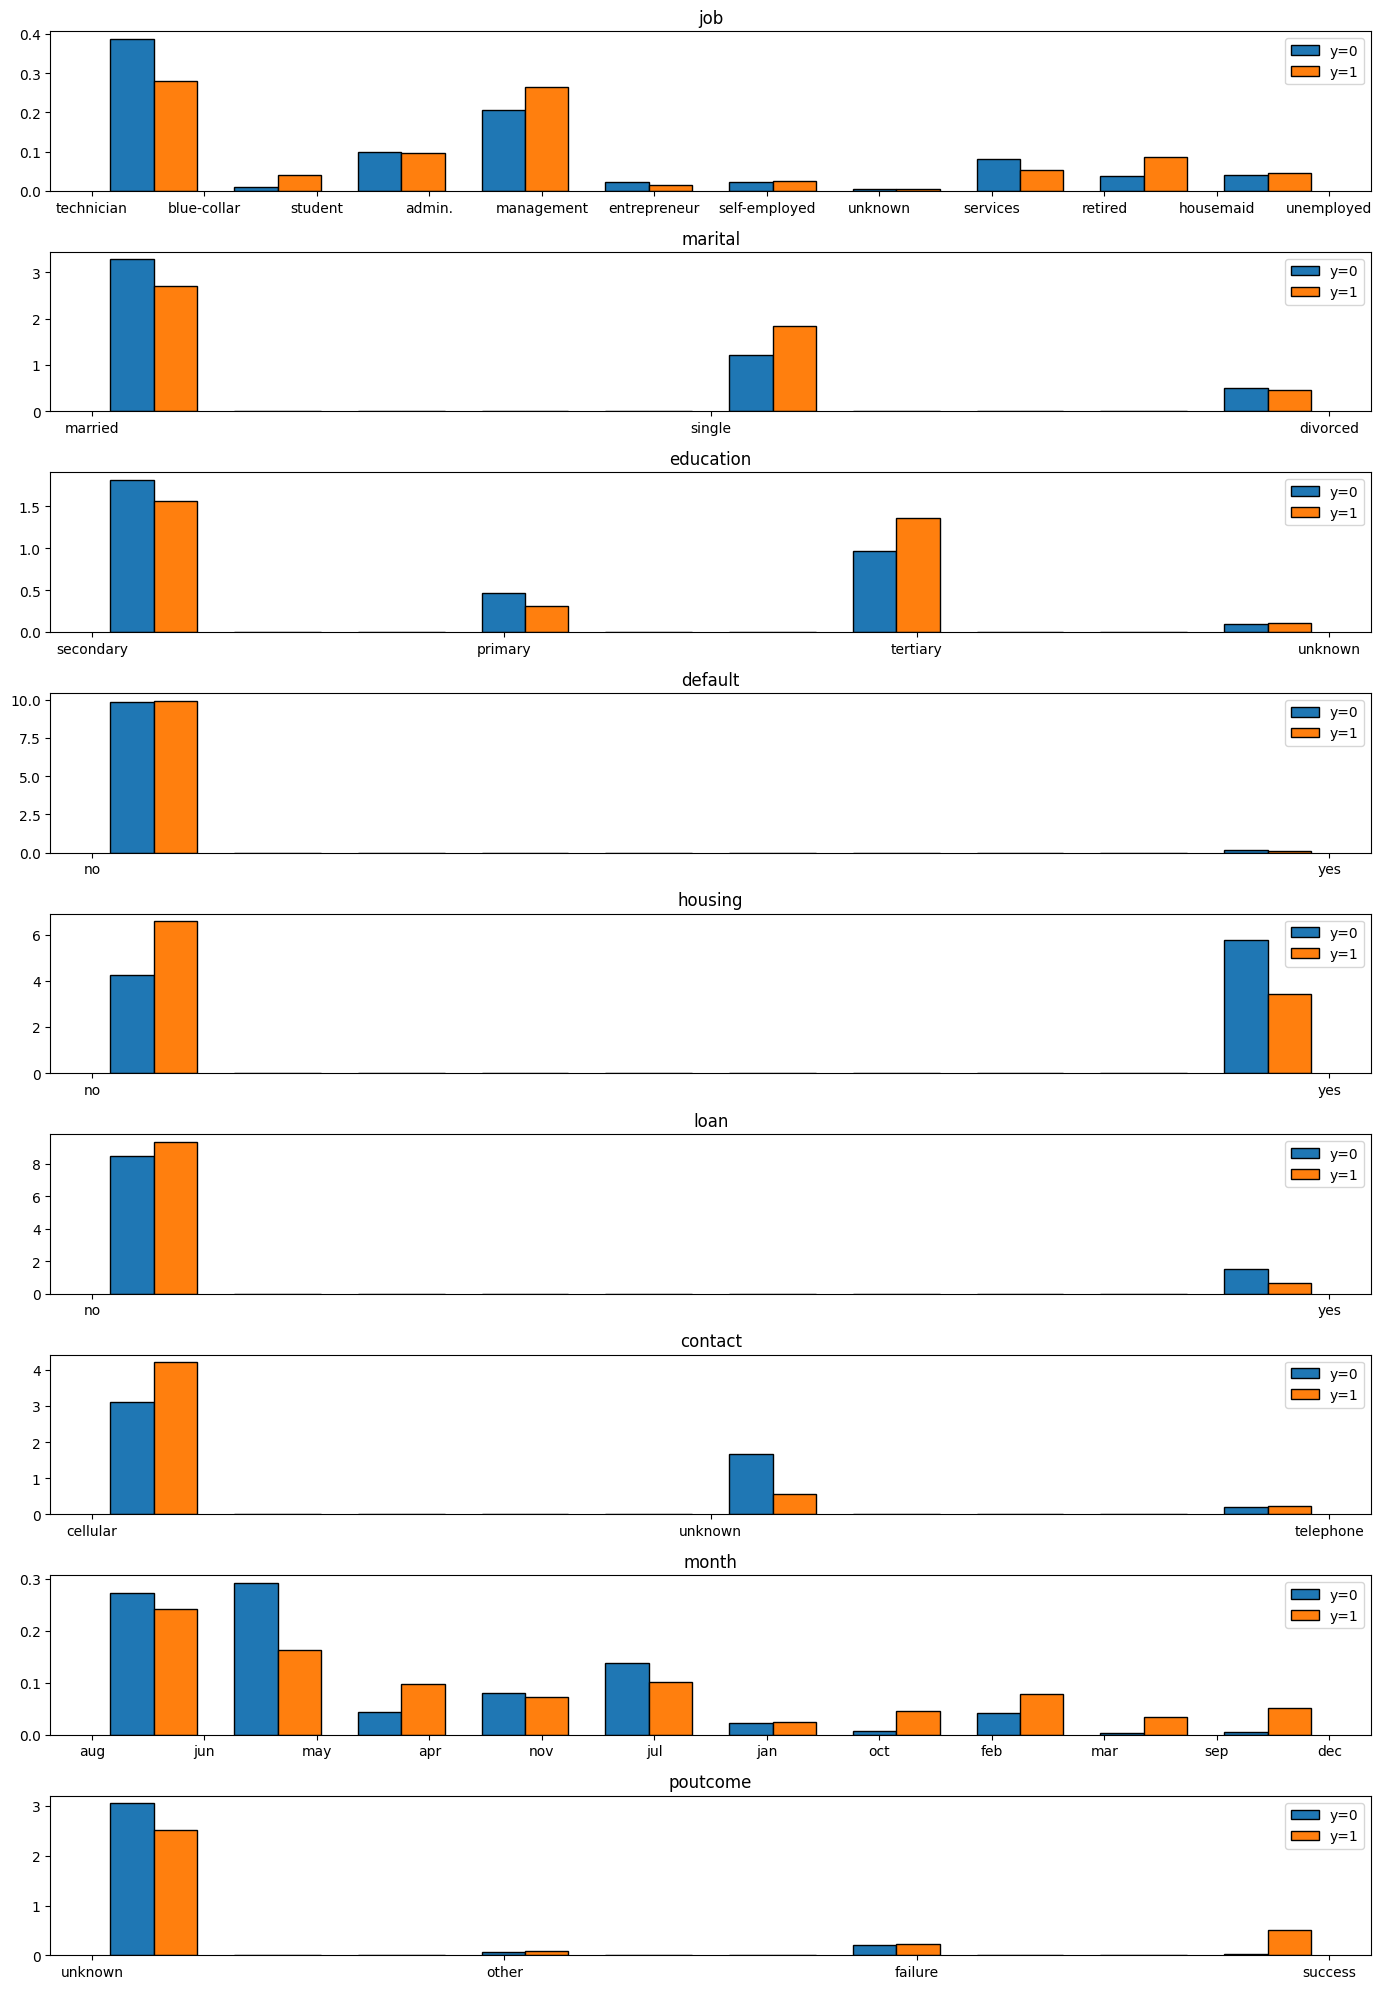

In [15]:
import matplotlib.pyplot as plt
# カテゴリ列の分布
def catplot(cols):
    
    fig, ax = plt.subplots(9,1,figsize=(14,20))

    for i, col in enumerate(cols):

        x1 = train_df.loc[train_df["y"]==0, col]
        x2 = train_df.loc[train_df["y"]==1, col]
        X = [x1, x2]
        ax[i].hist(X, label=["y=0", "y=1"], ec="k",density=True, rwidth=0.7) 
        ax[i].legend()
        ax[i].set_title(col)

    plt.tight_layout()
    plt.show()

catplot(cat_col)

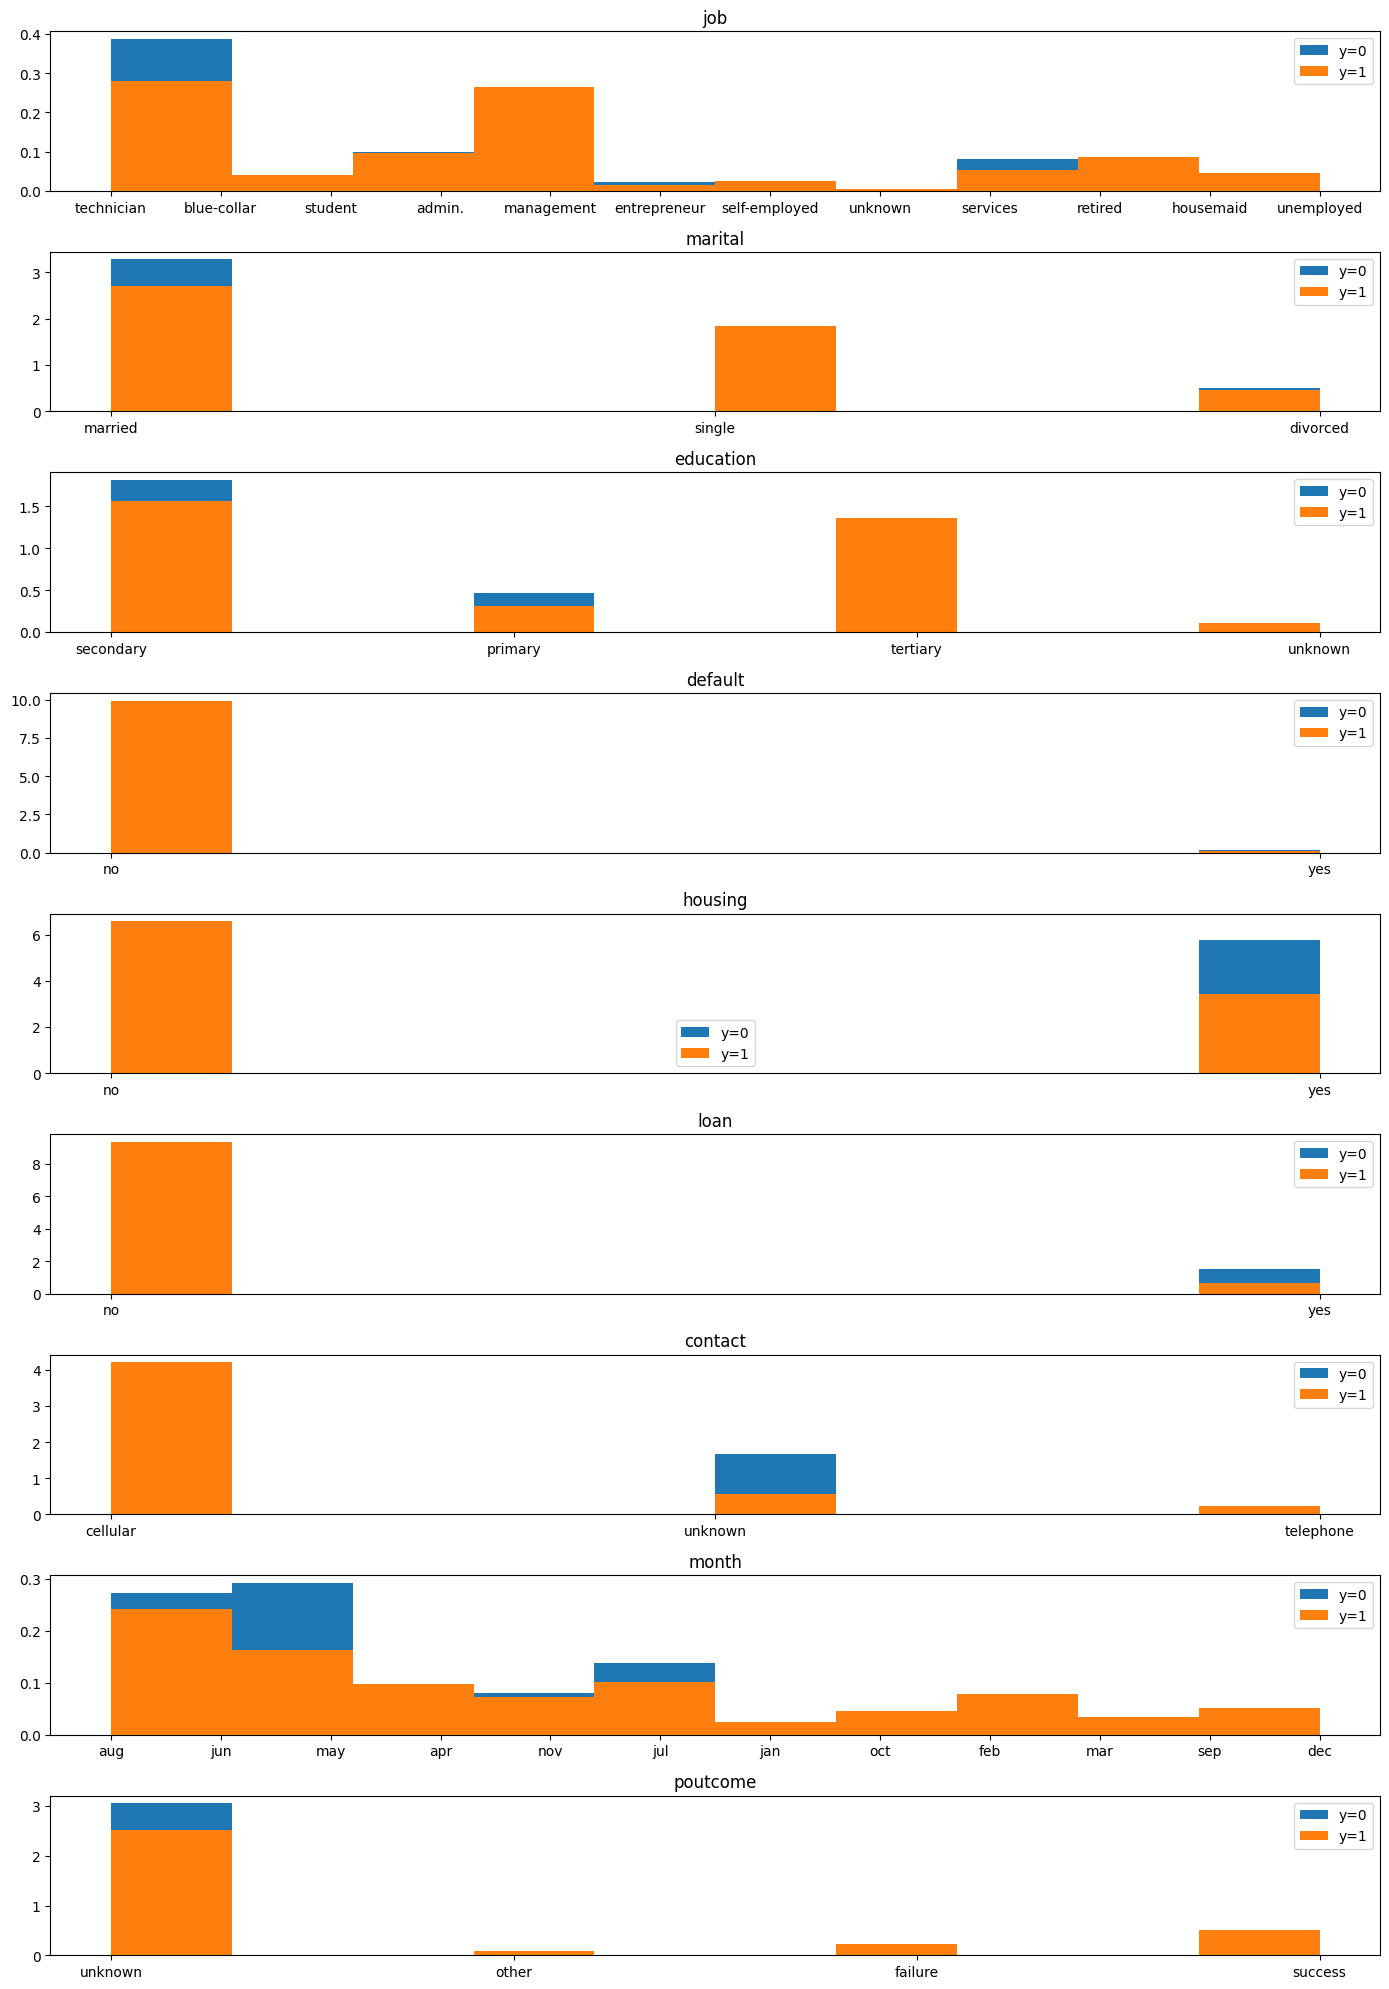

In [33]:
import matplotlib.pyplot as plt

def catplot(cols):

    # 全体の大きさ
    plt.figure(figsize=(14,20))
    
    for i, col in enumerate(cols):

        # 上下5%の値を取る
        # low,high = train_df[col].quantile([0,0.99])
        
        # レイアウトの順番
        layout = 911 + i

        plt.subplot(layout)
        # plt.hist(train_df.loc[train_df["y"]==0,col],histtype="barstacked",label="y=0")
        # plt.hist(train_df.loc[train_df["y"]==1,col],histtype="barstacked",label="y=1")
        # plt.hist(train_df.loc[train_df["y"]==0,col],histtype="barstacked",density=True,label="y=0")
        # plt.hist(train_df.loc[train_df["y"]==1,col],histtype="barstacked",density=True,label="y=1")
        plt.hist(train_df.loc[train_df["y"]==0,col],density=True,label="y=0")
        plt.hist(train_df.loc[train_df["y"]==1,col],density=True,label="y=1")
        # plt.xlim(low,high)
        plt.title(col)
        plt.legend()

    # 揃える
    plt.tight_layout()

    # 描画する
    plt.show()

catplot(cat_col)

In [22]:
# カテゴリデータの変数情報
for col in cat_col:
    print(f"\n変数の種類： '{col}':")
    print(train_df[col].value_counts(),test_df[col].value_counts())


変数の種類： 'job':
job
management       175541
blue-collar      170498
technician       138107
admin.            81492
services          64209
retired           35185
self-employed     19020
entrepreneur      17718
unemployed        17634
housemaid         15912
student           11767
unknown            2917
Name: count, dtype: int64 job
management       58636
blue-collar      56970
technician       45936
admin.           27009
services         21312
retired          11611
self-employed     6424
unemployed        6013
entrepreneur      5955
housemaid         5245
student           3867
unknown           1022
Name: count, dtype: int64

変数の種類： 'marital':
marital
married     480759
single      194834
divorced     74407
Name: count, dtype: int64 marital
married     160412
single       64717
divorced     24871
Name: count, dtype: int64

変数の種類： 'education':
education
secondary    401683
tertiary     227508
primary       99510
unknown       21299
Name: count, dtype: int64 education
secondary    

In [ ]:
# 訓練データとテストデータに分離
train = all_df[:len(train_df)]
test = all_df[len(train_df):]

# 訓練データをx,yに分割
X_train = train.drop(["id","y"],axis=1)
y_train = train["y"]
X_test = test.drop(["id","y"],axis=1)

In [ ]:
# ラベルエンコード
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

for col in X_train.columns:
    if col in cat_col:
        
        # 訓練データでfit
        LE.fit(X_train[col])

        # 訓練・テストデータをそれぞれtransform
        X_train[col] = LE.transform(X_train[col])
        X_test[col] = LE.transform(X_test[col])

# データフレーム変換
X_train_df = pd.DataFrame(X_train,columns=cat_col)
X_test_df = pd.DataFrame(X_test,columns=cat_col)

### 【Light GBM】

In [ ]:
# ###################################################
# ############ Light GBM ############################
# ###################################################
# import lightgbm as lgb
# from sklearn.metrics import roc_auc_score
# from sklearn.model_selection import KFold
# from sklearn.model_selection import StratifiedKFold

# # 学習、バリデーションデータ
# pred_lgb = np.zeros(len(train_df))
# pred_lgb_test = np.zeros(len(test_df))
# models_lgb = []

# # 入力データ
# X = X_train
# y = y_train

# # 評価履歴を格納する辞書
# evals_result_lgb = {}

# # パラメータ
# lgbm_params = {
#     'objective': 'binary',
#     "device": "cpu",
#     # "device": "gpu",
#     'metric': 'auc',
#     'verbose': -1,              # ログ出力の制御
#     'boosting_type': 'gbdt',
#     # 'learning_rate': 0.01,
#     # 'feature_fraction': 0.6956717916553479,
#     # 'num_leaves':       153,
#     # 'bagging_fraction': 0.5279852787927486,
#     # 'bagging_freq':     4,
#     # 'lambda_l1':        0.004603414256652151,
#     # 'lambda_l2':        0.013858762846118894,
#     # 'min_data_in_leaf': 87,
#     }

# # クロスバリデーション
# # kf = KFold(n_splits=5, shuffle=True, random_state=42)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # for fold,(train_idx,valid_idx) in enumerate(kf.split(X)):
# for fold,(train_idx,valid_idx) in enumerate(skf.split(X,y)):

#     print("#"*25)
#     print(f"### Folf {fold+1}")
#     print("#"*25)
    
#     X_train_kf = X.iloc[train_idx,:]
#     y_train_kf = y.iloc[train_idx]
#     X_valid_kf = X.iloc[valid_idx,:]
#     y_valid_kf = y.iloc[valid_idx]
    
#     # データセット作成
#     lgb_train_lgb = lgb.Dataset(X_train_kf,y_train_kf)
#     lgb_valid_lgb = lgb.Dataset(X_valid_kf,y_valid_kf)


#     # 学習
#     model_lgb = lgb.train(
#         lgbm_params,
#         lgb_train_lgb,
#         num_boost_round=2000,
#         valid_sets=[lgb_train_lgb,lgb_valid_lgb],
#         valid_names=["train","valid"],
#         callbacks=[
#             lgb.early_stopping(stopping_rounds=100,verbose=False),
#             lgb.record_evaluation(evals_result_lgb),
#             lgb.log_evaluation(100),])

#     # 各foldでのバリデーション予測
#     pred_lgb[valid_idx] = model_lgb.predict(
#         X_valid_kf, num_iteration=model_lgb.best_iteration)
    
#     # モデルの追加
#     models_lgb.append(model_lgb)

#     # テストの予測
#     pred_lgb_test = pred_lgb_test + model_lgb.predict(
#         X_test, num_iteration=model_lgb.best_iteration)

# # FOLD数で割る
# pred_lgb_test = pred_lgb_test/5

In [ ]:
# # 訓練データのスコア
# from sklearn.metrics import f1_score
# import matplotlib.pyplot as plt

# AUC_lgb = roc_auc_score(y,pred_lgb)
# F1_lgb = f1_score(y,np.round(pred_lgb,0))
# print(f"LGB: AUC score = {AUC_lgb}, F1 = {F1_lgb}")

# # 学習曲線
# # lgb.plot_metric(evals_result_lgb,title="LightGBM AUC",)

In [ ]:
# # 提出データ作成
# sample_submission = pd.read_csv("/kaggle/input/playground-series-s5e8/sample_submission.csv")

# sample_submission['y'] = pred_lgb_test
# sample_submission.to_csv('submission.csv', index=False)
# print('Submission file saved.')

### 【XGBoost】

In [ ]:
# #################################################
# ############ XGBoost ############################
# #################################################
# import xgboost as xgb
# from sklearn.metrics import roc_auc_score
# from sklearn.model_selection import KFold
# from sklearn.model_selection import StratifiedKFold

# # 学習、バリデーションデータ
# pred_xgb = np.zeros(len(train_df))
# pred_xgb_test = np.zeros(len(test_df))
# models_xgb = []

# # 入力データ
# X = X_train
# y = y_train

# # 評価履歴を保存する辞書
# evals_result_xgb = {}

# # パラメータ
# xgb_params = {
#     "objective": "binary:logistic",
#     "tree_method": "hist",
#     # "tree_method": "gpu_hist",
#     # "gpu_id": 0,
#     "eval_metric": "auc",
# }

# # クロスバリデーション
# # kf = KFold(n_splits=5, shuffle=True, random_state=42)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # for fold, (train_idx,valid_idx) in enumerate(kf.split(X)):
# for fold,(train_idx,valid_idx) in enumerate(skf.split(X,y)):

#     print("#"*25)
#     print(f"### Fold {fold+1}")
#     print("#"*25)

#     # foldごとの訓練、バリデーションデータ
#     X_train_kf = X.iloc[train_idx,:]
#     y_train_kf = y.iloc[train_idx]
#     X_valid_kf = X.iloc[valid_idx,:]
#     y_valid_kf = y.iloc[valid_idx]

#     # DMatrixに変換
#     dtrain = xgb.DMatrix(X_train_kf,label=y_train_kf)
#     dvalid = xgb.DMatrix(X_valid_kf,label=y_valid_kf)

#     # 学習
#     model_xgb = xgb.train(
#         xgb_params,
#         dtrain,
#         num_boost_round=2000,
#         evals=[(dtrain,"train"),(dvalid,"valid")],
#         early_stopping_rounds=100,
#         evals_result=evals_result_xgb,
#         verbose_eval=100,
#     )

#     # 各foldでのバリデーション予測
#     pred_xgb[valid_idx] = model_xgb.predict(
#         dvalid,
#         iteration_range=(0,model_xgb.best_iteration+1))

#     # モデルの追加
#     models_xgb.append(model_xgb)

#     # テストの予測
#     dtest = xgb.DMatrix(X_test)
#     pred_xgb_test = pred_xgb_test + model_xgb.predict(
#         dtest,
#         iteration_range=(0,model_xgb.best_iteration+1))

# # FOLD数で割る
# pred_xgb_test = pred_xgb_test/5

In [ ]:
# # 訓練データのスコア
# from sklearn.metrics import f1_score

# AUC_xgb = roc_auc_score(y,pred_xgb)
# F1_xgb = f1_score(y,np.round(pred_xgb,0))
# print(f"XGB: AUC score = {AUC_xgb}, F1 = {F1_xgb}")

In [ ]:
# # 提出データ作成
# sample_submission = pd.read_csv("/kaggle/input/playground-series-s5e8/sample_submission.csv")

# sample_submission['y'] = pred_xgb_test
# sample_submission.to_csv('submission.csv', index=False)
# print('Submission file saved.')

In [ ]:
# # 学習曲線の描画
# from matplotlib.pyplot as plt
# epochs = len(evals_result_xgb['train']['auc'])
# x_axis = range(0, epochs)

# plt.figure()
# plt.plot(x_axis, evals_result_xgb['train']['auc'], label='Train')
# plt.plot(x_axis, evals_result_xgb['valid']['auc'], label='Validation')
# plt.xlabel('Iteration')
# plt.ylabel('AUC')
# plt.title('XGBoost AUC')
# plt.grid()
# plt.legend()
# plt.show()

### 【CatBoost】

In [ ]:
# #################################################
# ############ CatBoost ############################
# #################################################
# from catboost import Pool, train
# from sklearn.metrics import roc_auc_score
# from sklearn.model_selection import KFold
# from sklearn.model_selection import StratifiedKFold

# # 学習、バリデーションデータ
# pred_cb = np.zeros(len(train_df))
# pred_cb_test = np.zeros(len(test_df))
# models_cb = []

# # 入力データ
# X = X_train
# y = y_train

# # 履歴を保存
# cb_auc_valid = []

# cat_params = {
#     "loss_function": "Logloss",
#     "eval_metric": "AUC",
#     # "task_type": "CPU",
#     "task_type": "GPU",
#     # "devices": "0",
#     "iterations": 2000,
#     "verbose": 100,
# }

# # クロスバリデーション
# # kf = KFold(n_splits=5, shuffle=True, random_state=42)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # for fold, (train_idx,valid_idx) in enumerate(kf.split(X)):
# for fold,(train_idx,valid_idx) in enumerate(skf.split(X,y)):

#     print("#"*25)
#     print(f"### Fold {fold+1}")
#     print("#"*25)
    
#     X_train_kf = X.iloc[train_idx,:]
#     y_train_kf = y.iloc[train_idx]
#     X_valid_kf = X.iloc[valid_idx,:]
#     y_valid_kf = y.iloc[valid_idx]    

#     # object型をカテゴリ型に変換
#     for col in cat_col:
#         X_train_kf.loc[:,col] = X_train_kf.loc[:,col].astype("category")
#         X_valid_kf.loc[:,col] = X_valid_kf.loc[:,col].astype("category")

#     # データセット設定
#     train_pool = Pool(X_train_kf,y_train_kf,cat_features=cat_col)
#     valid_pool = Pool(X_valid_kf,y_valid_kf,cat_features=cat_col)

#     # 学習
#     model_cb = train(
#         params=cat_params,
#         dtrain=train_pool,
#         eval_set=valid_pool,
#         early_stopping_rounds=100)

#     # 各foldでのバリデーション予測
#     pred_cb[valid_idx] = model_cb.predict(X_valid_kf,
#         ntree_end=model_cb.best_iteration_,
#         prediction_type="Probability"
#     )[:,1]
    

#     # モデルを追加
#     models_cb.append(model_cb)

#     evals_result = model_cb.get_evals_result()
#     cb_auc_valid.append(evals_result["validation"]["AUC"])

#     # テストの予測
#     pred_cb_test = pred_cb_test + model_cb.predict(X_test,
#         ntree_end=model_cb.best_iteration_,
#         prediction_type="Probability"
#     )[:,1]

# # FOLD数で割る
# pred_cb_test = pred_cb_test/5

In [ ]:
# from sklearn.metrics import f1_score

# # スコア表示
# AUC_cb = roc_auc_score(y,pred_cb)
# F1_cb = f1_score(y,np.round(pred_cb,0))
# print(f"CB: AUC score = {AUC_cb}, F1 = {F1_cb}")

# # 学習履歴を一番短いfoldに揃える
# min_len = min(len(m) for m in cb_auc_valid)
# cb_auc_score = [m[:min_len] for m in cb_auc_valid]

# # foldごとの結果を平均する
# cb_auc_score = np.average(cb_auc_score,axis=0)

In [ ]:
# # 提出データ作成
# sample_submission = pd.read_csv("/kaggle/input/playground-series-s5e8/sample_submission.csv")

# sample_submission['y'] = pred_cb_test
# sample_submission.to_csv('submission.csv', index=False)
# print('Submission file saved.')

In [ ]:
# import  matplotlib.pyplot as plt
# # 履歴の可視化
# plt.plot(cb_auc_score, label='Validation')
# plt.xlabel('Iteration')
# plt.ylabel('AUC')
# plt.grid()
# plt.legend()
# plt.title("CabBoost AUC")
# plt.show()

### 【Neural Net】

In [ ]:
import random
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# pytorch実装
import torch # Tensorの作成や操作
import torch.nn as nn # ニューラルネットワーク
import torch.nn.functional as F # 関数をメソッドとして提供
import torch.optim as optim # オプティマイザ
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
import matplotlib.pyplot as plt
import time

# GPUの使用状況確認
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# データフレーム読み込み
train_df = pd.read_csv("/kaggle/input/playground-series-s5e8/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s5e8/test.csv")

# 設定
SEED = 42
CATEGORICAL = cat_col
NUMERICAL = num_col
TARGET = "y"
USE = CATEGORICAL + NUMERICAL
df_train = train_df.drop("id",axis=1)
df_test = test_df.drop("id",axis=1)

In [ ]:
# 標準化 + ラベルエンコード
def preprocessing(df_train, df_test, cat_cols=CATEGORICAL, num_cols=NUMERICAL, target=TARGET):

    # 訓練データ + テストデータ
    df = pd.concat([df_train.drop(columns=target), df_test])
    y = df_train[target]
    train_len = len(df_train)
    
    # 欠損埋め
    df[cat_cols] = df[cat_cols].fillna('None')
    df[num_cols] = df[num_cols].fillna(0)

    train = df[:train_len]
    test = df[train_len:]

    # 標準化
    scaler = StandardScaler()

    # フィッティング
    # scaler.fit(df[num_cols])
    scaler.fit(train[num_cols])

    # 適用
    train[num_cols] = scaler.transform(train[num_cols])
    test[num_cols] = scaler.transform(test[num_cols])
    df = pd.concat([train, test])
    
    # ラベルエンコーダ
    for col in df.columns:
        if col in cat_cols:
            df[col] = LabelEncoder().fit_transform(df[col])
            df[col]= df[col].astype('category')
            
    return pd.concat([df.iloc[:train_len], y], axis=1), df.iloc[train_len:]

In [ ]:
# データセット関数
class CustomDataset(Dataset):

    # オブジェクト定義
    def __init__(self, df, target, cat_cols=CATEGORICAL):
        self.df_cat = df[cat_cols]
        self.df_num = df.drop(cat_cols, axis=1)
        self.X_cats = self.df_cat.values.astype(np.int64)
        self.X_nums = self.df_num.values.astype(np.float32)
        self.target = target.values.astype(np.int64)

    # データセットのサイズを返す
    def __len__(self):
        return len(self.target)

    # 指定したインデックスのデータとラベルを返す
    def __getitem__(self, idx):
        return [self.X_cats[idx], self.X_nums[idx], self.target[idx]]

In [ ]:
# NNモデル作成
class NN_Model(nn.Module):

    # ネットワーク構造の定義
    def __init__(self, embedding_sizes, n_num):
        super().__init__()
        self.embeddings = nn.ModuleList([nn.Embedding(categories, size) for categories, size in embedding_sizes])
        n_emb = sum(e.embedding_dim for e in self.embeddings)
        self.n_emb, self.n_num = n_emb, n_num
        self.lin1 = nn.Linear(self.n_emb + self.n_num, 100)
        self.lin2 = nn.Linear(100, 70)
        self.lin3 = nn.Linear(70, 2)
        self.bn1 = nn.BatchNorm1d(self.n_num)
        self.bn2 = nn.BatchNorm1d(100)
        self.bn3 = nn.BatchNorm1d(70)
        self.emb_drop = nn.Dropout(0.6)
        self.drops = nn.Dropout(0.3)
 
    # 順伝播
    def forward(self,x_cat,x_num):
        x = [e(x_cat[:, i]) for i, e in enumerate(self.embeddings)]
        x = torch.cat(x, dim=1)
        x = self.emb_drop(x)
        x2 = self.bn1(x_num)
        x = torch.cat([x, x2], dim=1)
        x = F.relu(self.lin1(x))
        x = self.drops(x)
        x = self.bn2(x)
        x = F.relu(self.lin2(x))
        x = self.drops(x)
        x = self.bn3(x)
        x = self.lin3(x)
        return x

In [ ]:
# 前処理の実施
df_train, df_test = preprocessing(df_train, df_test)

# ラベルエンコード済みカテゴリ変数の埋め込み
# 各カテゴリ列の変数の種類
cat_sizes = [len(df_train[col].cat.categories) for col in CATEGORICAL]

# (入力サイズ, 50と割る2の小さい方)でエンコード
emb_sizes = [(size, min(50, (size+1)//2)) for size in cat_sizes]

In [ ]:
# 記録用
hist = {
    'train_loss': [], 'train_auc': [],
    'val_loss': [], 'val_auc': []
}

# パラメータ
bs = 64 # バッチサイズ
EPOCHS = 10 # エポック
FOLDS = 5 # FOLD数
LR=1e-3 # 学習率

# stratified KFoldの宣言
skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=42)

fold_results = []

test_results = []

# SKFによるデータ分割
for fold, (train_idx, val_idx) in enumerate(skf.split(df_train.drop(columns=TARGET), df_train[TARGET])):
    
    print(f"\n========== Fold {fold+1} ==========")

    # 学習データ
    X_train = df_train.drop(columns=TARGET).iloc[train_idx] 
    y_train = df_train[TARGET].iloc[train_idx]

    # バリデーションデータ
    X_val = df_train.drop(columns=TARGET).iloc[val_idx]
    y_val = df_train[TARGET].iloc[val_idx]

    # Datasetの作成
    train_dataset = CustomDataset(X_train, y_train)
    val_dataset = CustomDataset(X_val, y_val)
    
    # DataLoaderの作成
    train_loader = DataLoader(train_dataset, batch_size=bs, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=bs, shuffle=False)

    # モデル構築
    model = NN_Model(emb_sizes, len(NUMERICAL)).to(device)

    # 最適化設定
    optimizer = torch.optim.Adam(model.parameters(), lr=LR)

    # 損失関数
    criterion = nn.CrossEntropyLoss()

    hist = {"train_auc": [], "val_auc": []}

    # 学習・予測エポックのループ
    for epoch in range(EPOCHS):

        # 開始時間
        start_time = time.time()

        # 学習モード
        model.train()

        # ラベル、予測値の保存場所
        y_true_train, y_pred_train = [], []

        # プログレスバー
        train_iter = tqdm(train_loader, desc=f"<Train> Epoch {epoch+1}", leave=False)
        
        for cat_data, num_data, target in train_iter:

            # DataLoaderから取り出した、カテゴリ、数値、ターゲット
            cat_data, num_data, target = cat_data.to(device), num_data.to(device), target.to(device)

            # パラメータの勾配を初期化
            optimizer.zero_grad()

            # 予測値の算出
            output = model(cat_data, num_data)

            # ラベルと予測値とのロス計算
            loss = criterion(output, target)

            # 各パラメータの勾配を算出
            loss.backward()

            # パラメータ更新
            optimizer.step()

            # ソフトマックスの分類結果を格納
            probs = torch.softmax(output, dim=1)[:, 1].detach().cpu().numpy()
            y_pred_train.extend(probs)

            # ラベルの格納
            y_true_train.extend(target.cpu().numpy())

            # プログレスバーの後ろにロス値を表示
            train_iter.set_postfix(loss=loss.item())

        # histに残すAUCスコア
        train_auc = roc_auc_score(y_true_train, y_pred_train)

        # 評価モード
        model.eval()

        # ラベル、予測値の保存場所        
        y_true_val, y_pred_val = [], []

        # プログレスバー
        val_iter = tqdm(val_loader, desc=f"<Val> Epoch {epoch+1}", leave=False)

        # 勾配を更新しない
        with torch.no_grad():
            
            for cat_data, num_data, target in val_iter:
    
                # DataLoaderから取り出した、カテゴリ、数値、ターゲット
                cat_data, num_data, target = cat_data.to(device), num_data.to(device), target.to(device)

                # 予測値の算出
                output = model(cat_data, num_data)

                # ソフトマックスの分類結果を格納
                probs = torch.softmax(output, dim=1)[:, 1].cpu().numpy()
                y_pred_val.extend(probs)

                # ラベルの格納
                y_true_val.extend(target.cpu().numpy())

                # プログレスバーの後ろにロス値を表示
                val_iter.set_postfix(loss=criterion(output, target).item())

        # histに残すAUCスコア        
        val_auc = roc_auc_score(y_true_val, y_pred_val)

        # 差分時刻
        elapsed = time.time() - start_time

        # 履歴追加
        hist["train_auc"].append(train_auc)
        hist["val_auc"].append(val_auc)

        # 進捗
        print(f"Epoch {epoch+1}/{EPOCHS} - TrainAUC: {train_auc:.4f} | ValAUC: {val_auc:.4f} | Time: {elapsed:.1f}s")

    # foldごとに保存
    torch.save(model.state_dict(), f"model_fold{fold+1}.pth")
    
    # ヒストグラムの更新
    fold_results.append(hist)

    # foldごとにテストデータ計算
    model.eval()
    with torch.no_grad():
        X_test_cat = torch.from_numpy(df_test[CATEGORICAL].values.astype(np.int64)).to(device)
        X_test_num = torch.from_numpy(df_test[NUMERICAL].values.astype(np.float32)).to(device)

        # 予測
        preds = torch.softmax(model(X_test_cat, X_test_num),dim=1)[:,1].cpu().numpy()
        # preds = torch.softmax(model(X_test_cat, X_test_num).squeeze()).cpu().numpy()
        test_results.append(preds)
    
# shape = (n_folds, n_test_samples) → 平均化
test_results = np.mean(test_results, axis=0)        

In [ ]:
len(test_results)

In [ ]:
# 提出データ作成
sample_submission = pd.read_csv("/kaggle/input/playground-series-s5e8/sample_submission.csv")

sample_submission['y'] = test_results
sample_submission.to_csv('submission.csv', index=False)
print('Submission file saved.')

In [ ]:
# # ======================
# # FoldごとのAUCをプロット
# # ======================
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10,5))
# for i, hist in enumerate(fold_results):
#     plt.plot(hist["val_auc"], label=f"Fold {i+1} Val AUC")
# plt.xlabel("Epoch")
# plt.ylabel("AUC")
# plt.legend()
# plt.title("Validation AUC per Fold")
# plt.show() 

In [ ]:
# # 提出データ作成
# sample_submission = pd.read_csv("/kaggle/input/playground-series-s5e8/sample_submission.csv")

# sample_submission['y'] = pred_lgb_test
# sample_submission.to_csv('submission.csv', index=False)
# print('Submission file saved.')

In [ ]:
# # 検証データの誤差の可視化
# train_loss = hist['train_loss']
# val_loss = hist['val_loss']

# fig = plt.figure()
# plt.rc('font', family='serif')
# plt.plot(range(len(train_loss)), train_loss, linewidth=1, label='train_loss')
# plt.plot(range(len(val_loss)), val_loss, color='red', linewidth=1, label='val_loss')
# plt.xlabel('epochs')
# plt.ylabel('loss')
# plt.legend()
# plt.show()

In [ ]:
# print(f'validation data best acc : {best_acc}')

# # 検証データの精度の可視化
# train_acc = hist['train_accuracy']
# val_acc = hist['val_accuracy']

# fig = plt.figure()
# plt.rc('font', family='serif')
# plt.plot(range(len(train_acc)), train_acc, linewidth=1, label='train_acc')
# plt.plot(range(len(val_acc)), val_acc, color='red', linewidth=1, label='val_acc')
# plt.xlabel('epochs')
# plt.ylabel('accuracy')
# plt.legend()
# plt.show()

In [ ]:
# # 記録用
# hist = {
#     'train_loss': [], 'train_auc': [],
#     'val_loss': [], 'val_auc': []
# }

# # パラメータ
# bs = 64 # バッチサイズ
# EPOCHS = 5 # エポック
# FOLDS = 5 # FOLD数
# LR=1e-3 # 学習率

# # stratified KFoldの宣言
# skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=42)

# fold_results = []

# for fold, (train_idx, val_idx) in enumerate(skf.split(df_train.drop(columns=TARGET), df_train[TARGET])):
    
#     print(f"\n========== Fold {fold+1} ==========")

#     # データ分割
#     X_train, X_val = df_train.drop(columns=TARGET).iloc[train_idx], df_train.drop(columns=TARGET).iloc[val_idx]
#     y_train, y_val = df_train[TARGET].iloc[train_idx], df_train[TARGET].iloc[val_idx]

#     # Dataset / DataLoader
#     train_dataset = CustomDataset(X_train, y_train)
#     val_dataset = CustomDataset(X_val, y_val)
#     train_loader = DataLoader(train_dataset, batch_size=bs, shuffle=True)
#     val_loader = DataLoader(val_dataset, batch_size=bs, shuffle=False)

#     # モデル・最適化・損失
#     model = NN_Model(emb_sizes, len(NUMERICAL)).to(device)
#     optimizer = torch.optim.Adam(model.parameters(), lr=LR)
#     criterion = nn.CrossEntropyLoss()

#     hist = {"train_auc": [], "val_auc": []}

#     for epoch in range(EPOCHS):
#         start_time = time.time()

#         # ===== 学習 =====
#         model.train()
#         y_true_train, y_pred_train = [], []
#         train_iter = tqdm(train_loader, desc=f"<Train> Epoch {epoch+1}", leave=False)
#         for cat_data, num_data, target in train_iter:
#             cat_data, num_data, target = cat_data.to(device), num_data.to(device), target.to(device)

#             optimizer.zero_grad()
#             output = model(cat_data, num_data)
#             loss = criterion(output, target)
#             loss.backward()
#             optimizer.step()

#             probs = torch.softmax(output, dim=1)[:, 1].detach().cpu().numpy()
#             y_pred_train.extend(probs)
#             y_true_train.extend(target.cpu().numpy())
#             train_iter.set_postfix(loss=loss.item())

#         train_auc = roc_auc_score(y_true_train, y_pred_train)

#         # ===== 検証 =====
#         model.eval()
#         y_true_val, y_pred_val = [], []
#         val_iter = tqdm(val_loader, desc=f"<Val> Epoch {epoch+1}", leave=False)
#         with torch.no_grad():
#             for cat_data, num_data, target in val_iter:
#                 cat_data, num_data, target = cat_data.to(device), num_data.to(device), target.to(device)
#                 output = model(cat_data, num_data)
#                 probs = torch.softmax(output, dim=1)[:, 1].cpu().numpy()
#                 y_pred_val.extend(probs)
#                 y_true_val.extend(target.cpu().numpy())
#                 val_iter.set_postfix(loss=criterion(output, target).item())

#         val_auc = roc_auc_score(y_true_val, y_pred_val)
#         elapsed = time.time() - start_time

#         hist["train_auc"].append(train_auc)
#         hist["val_auc"].append(val_auc)

#         print(f"Epoch {epoch+1}/{EPOCHS} - TrainAUC: {train_auc:.4f} | ValAUC: {val_auc:.4f} | Time: {elapsed:.1f}s")

#     fold_results.append(hist)

#     # テストデータ

# # ======================
# # FoldごとのAUCをプロット
# # ======================
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10,5))
# for i, hist in enumerate(fold_results):
#     plt.plot(hist["val_auc"], label=f"Fold {i+1} Val AUC")
# plt.xlabel("Epoch")
# plt.ylabel("AUC")
# plt.legend()
# plt.title("Validation AUC per Fold")
# plt.show() 